In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishvaksena","key":"95985152fa60e0f585a18d698d052d85"}'}

In [ ]:
import os

# Create the .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the uploaded kaggle.json to the correct directory
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# Set the correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets download -d birdy654/environment-recognition-simulation-to-reality


Dataset URL: https://www.kaggle.com/datasets/birdy654/environment-recognition-simulation-to-reality
License(s): other


In [ ]:
import zipfile

# Unzip the downloaded file
with zipfile.ZipFile("environment-recognition-simulation-to-reality.zip", 'r') as zip_ref:
    zip_ref.extractall("environment_data")



In [ ]:
import os

for root, dirs, files in os.walk("environment_data"):
    print(f"📁 Directory: {root}")
    print(f"📄 Files: {files[:5]}")  # Preview first 5 files
    print("-----")
    break  # Remove this line to explore deeper


📁 Directory: environment_data
📄 Files: ['classesvirtual.csv', 'datasetvirtual.csv', 'classesreal.csv', 'datasetreal.csv', 'classes readme.txt']
-----


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "environment_data",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "environment_data",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 7154 images belonging to 2 classes.
Found 1787 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.9396 - loss: 0.1372 - val_accuracy: 0.9664 - val_loss: 0.0932
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9793 - val_loss: 0.0506
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.9782 - val_loss: 0.0537
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 0.9978 - val_loss: 0.0161
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9978 - val_loss: 0.0139
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.9975 - loss: 0.0040 - val_accuracy: 0.9966 - val_loss: 0.0170
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 1.0000 - loss: 1.8613e-04 - val_accuracy: 0.9983 - val_loss: 0.0130
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 1.0000 - loss: 2.0870e-04 - 

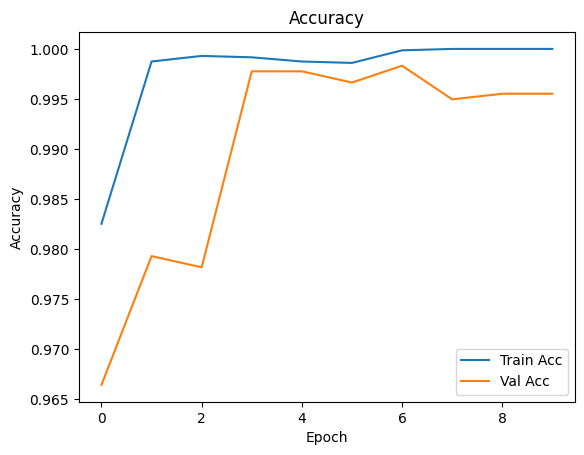

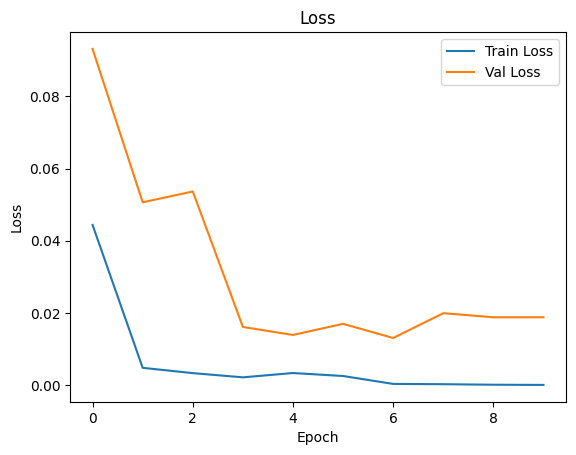

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


56/56 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step


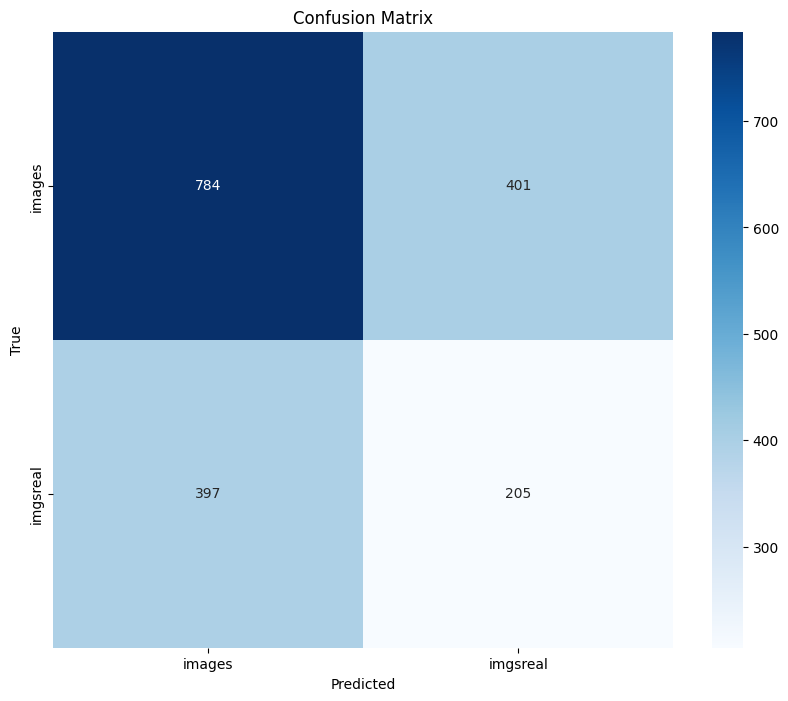

              precision    recall  f1-score   support

      images       0.66      0.66      0.66      1185
    imgsreal       0.34      0.34      0.34       602

    accuracy                           0.55      1787
   macro avg       0.50      0.50      0.50      1787
weighted avg       0.55      0.55      0.55      1787



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))


In [ ]:
from statsmodels.stats.weightstats import ztest

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

z_stat, p_val = ztest(train_acc, val_acc)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print(" Reject the Null Hypothesis: There's a significant difference.")
else:
    print(" Fail to Reject the Null Hypothesis: No significant difference.")


NameError: name 'history' is not defined